#Predicting sentiment from product reviews

#Fire up GraphLab Create

In [1]:
import sklearn, pandas
import numpy as np

import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#Read some product review data

Loading reviews for a set of baby products. 

In [2]:
#products = graphlab.SFrame('amazon_baby.gl/')
products = pandas.read_csv('amazon_baby.csv')

#Let's explore this data together

Data includes the product name, the review text and the rating of the review. 

In [3]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


#Build the word count vector for each review

In [4]:
#products['review'].dtype
from nltk.tokenize import word_tokenize
def word_count_function(string):
  count = {}
  for word in word_tokenize(string.strip()):
    count[word] = count.get(word, 0) + 1
  return count
products['word_count'] = products['review'].map(word_count_function, na_action="ignore")

In [5]:
products.head()

,name,review,rating,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,"{'These': 1, 'flannel': 1, 'wipes': 2, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


In [6]:
#graphlab.canvas.set_target('ipynb')
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#products['name'].show()
#products['name'].dropna().apply(pandas.value_counts) #.plot(kind='bar')
from collections import Counter
product_counter = Counter(products['name'].dropna().values)
print(product_counter.most_common(5))

[('Vulli Sophie the Giraffe Teether', 785), ('Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L', 562), ('Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision', 561), ('Baby Einstein Take Along Tunes', 547), ('Cloud b Twilight Constellation Night Light, Turtle', 520)]


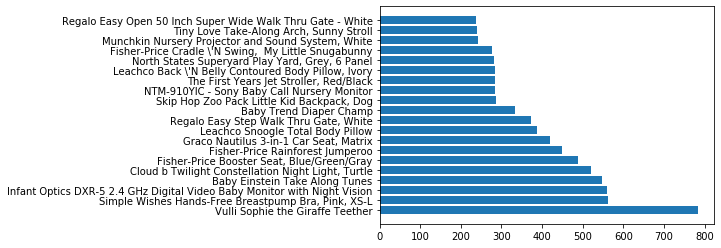

In [8]:
# Plot the products with the most reviews
best_products_plotted = 20
products_plotted = product_counter.most_common(best_products_plotted)
counter_labels, counts = zip(*products_plotted)
counter_pos = np.arange(best_products_plotted)
plt.barh(counter_pos, counts)
plt.yticks(counter_pos, counter_labels)
plt.show()

#Examining the reviews for most-sold product:  'Vulli Sophie the Giraffe Teether'

In [9]:
giraffe_reviews = products.loc[products['name'] == 'Vulli Sophie the Giraffe Teether']

In [10]:
len(giraffe_reviews)

785

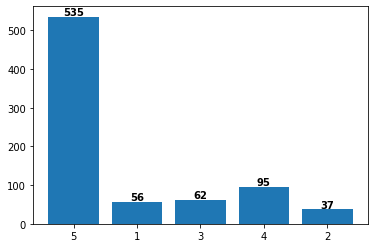

In [11]:
#giraffe_reviews['rating'].show(view='Categorical')
rating_counter = Counter(giraffe_reviews['rating'].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+4.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

#Build a sentiment classifier

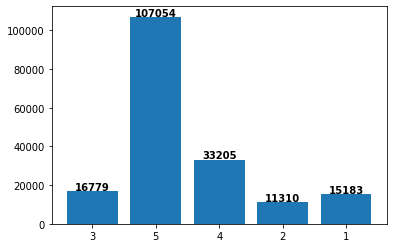

In [12]:
#products['rating'].show(view='Categorical')
rating_counter = Counter(products['rating'].values)
counter_pos = np.arange(len(rating_counter))
counter_labels, counts = zip(*rating_counter.items())
plt.bar(counter_pos, counts)
plt.xticks(counter_pos, counter_labels)
for i, v in enumerate(counts):
    plt.text(x=i, y=v+500.0, s=str(v), horizontalalignment='center', color='black', fontweight="bold")
plt.show()

##Define what's a positive and a negative sentiment

We will ignore all reviews with rating = 3, since they tend to have a neutral sentiment.  Reviews with a rating of 4 or higher will be considered positive, while the ones with rating of 2 or lower will have a negative sentiment.   

In [13]:
#ignore all 3* reviews
products = products.loc[products['rating'] != 3]

In [14]:
#positive sentiment = 4* or 5* reviews
products['sentiment'] = products['rating'] >=4

In [15]:
products.head()

,name,review,rating,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,"{'it': 3, 'came': 1, 'early': 1, 'and': 3, 'wa...",True
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,"{'Very': 1, 'soft': 1, 'and': 2, 'comfortable'...",True
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,"{'This': 1, 'is': 4, 'a': 2, 'product': 2, 'we...",True
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,"{'All': 1, 'of': 1, 'my': 1, 'kids': 2, 'have'...",True
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,"{'When': 1, 'the': 5, 'Binky': 3, 'Fairy': 3, ...",True


##Let's train the sentiment classifier

In [16]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(products.dropna(subset=("review", "sentiment")), train_size=0.8, test_size=0.2, random_state=0)
#train_data,test_data = products.random_split(.8, seed=0)
print(len(train_data), len(test_data))

132780 33195


In [17]:
# create training and test data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=word_tokenize)
train_features = vectorizer.fit_transform(train_data['review'].values)
train_labels = train_data['sentiment'].astype(int).values
test_features = vectorizer.transform(test_data['review'].values)
test_labels = test_data['sentiment'].astype(int).values

In [18]:
#sentiment_model = graphlab.logistic_classifier.create(train_data,
#                                                     target='sentiment',
#                                                     features=['word_count'],
#                                                     validation_set=test_data)
from sklearn.linear_model import LogisticRegression
sentiment_model = LogisticRegression(max_iter=1000).fit(train_features, train_labels)

/home/leanh/anaconda3/envs/ml-301x/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#Evaluate the sentiment model

In [19]:
print(sentiment_model.predict_proba(test_features[:2]))
print(sentiment_model.predict(test_features[:2]))

[[1.17978642e-04 9.99882021e-01]
 [9.99986006e-01 1.39942467e-05]]
[1 0]


Model score: 0.9353215845759904
FPR/TPR amount: 3283 3283


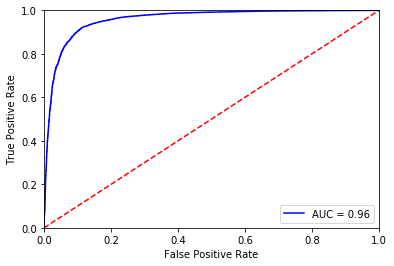

In [24]:
#sentiment_model.evaluate(test_data, metric='roc_curve')
from sklearn.metrics import roc_curve, roc_auc_score, auc
#print("Model predict proba", sentiment_model.predict_proba(test_features))
#print("Model predict proba column 2", sentiment_model.predict_proba(test_features)[:,1])
test_predictions = sentiment_model.predict_proba(test_features)[:, 1]
fpr, tpr, threshold = roc_curve(test_labels, test_predictions)
roc_auc = auc(fpr, tpr)
print("Model score:", sentiment_model.score(test_features, test_labels))
print("FPR/TPR amount:", len(fpr), len(tpr))

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [22]:
#sentiment_model.show(view='Evaluation')

#Applying the learned model to understand sentiment for Giraffe

In [23]:
giraffe_reviews = giraffe_reviews.dropna(subset=['review'])
giraffe_reviews_features = vectorizer.transform(giraffe_reviews['review'].values)
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict_proba(giraffe_reviews_features)[:, 1]

In [24]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'of': 1, 'he': 1, 'because': 1, 'the': 3, '.'...",0.998953
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'son': 1, 'great': 1, 'a': 1, 'just': 1, 'fit...",0.999739
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'.': 2, '2011': 1, 'for': 1, 'should': 1, 'be...",0.172617
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,"{'do': 1, 'for': 1, 'was': 1, 'another': 1, 't...",0.976369
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'Everything': 1, 'He': 1, 'for': 1, 'going': ...",0.396807


##Sort the reviews based on the predicted sentiment and explore

In [25]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

In [26]:
giraffe_reviews.head()

,name,review,rating,word_count,predicted_sentiment
34892,Vulli Sophie the Giraffe Teether,"Sophie, oh Sophie, your time has come. My gran...",5,"{'unheard': 1, 'mouth': 1, 'prisrob': 1, 'for'...",1.0
34434,Vulli Sophie the Giraffe Teether,My Mom-in-Law bought Sophie for my son when he...,5,"{'seem': 1, 'for': 3, 'he\': 2, '''': 1, 'as':...",1.0
34515,Vulli Sophie the Giraffe Teether,"As every mom knows, you always want to give yo...",5,"{'for': 6, 'girl': 3, 'every': 1, 'long': 1, '...",1.0
34442,Vulli Sophie the Giraffe Teether,"Yes, it\'s imported. Yes, it\'s expensive. And...",5,"{'mouth': 3, 'great': 1, 'for': 2, 'at': 1, 'n...",1.0
34746,Vulli Sophie the Giraffe Teether,Sophie the Giraffe is the perfect teething toy...,5,"{'gnawed': 1, 'for': 3, 'makes': 1, 'price': 1...",1.0


##Most positive reviews for the giraffe

In [ ]:
giraffe_reviews['review'].values[0]

In [ ]:
giraffe_reviews['review'].values[1]

##Show most negative reviews for giraffe

In [ ]:
giraffe_reviews['review'].values[-1]

In [ ]:
giraffe_reviews['review'].values[-2]